In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import TwoDimensionalHarmonicOscillator
from coupled_cluster.ccd import CoupledClusterDoubles
from coupled_cluster.mix import DIIS

In [2]:
n = 2
l = 20

radius = 8
num_grid_points = 401
omega = 1 / 6
mass = 1

tdho = TwoDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-8, verbose=True)

HF converged to given precision in 7 iterations
Ehf: (0.769149205466088+0j)


In [3]:
ccd = CoupledClusterDoubles(tdho, mixer=DIIS, np=np, verbose=True)
ccd.iterate_t_amplitudes()
ccd.iterate_l_amplitudes()

print("Ground state energy: {0}".format(ccd.compute_energy()))

Iteration: 0	Residuals (t): [0.16812783736597098]
Iteration: 1	Residuals (t): [0.0572557721779723]
Iteration: 2	Residuals (t): [0.027244039418972296]
Iteration: 3	Residuals (t): [0.007751080668686194]
Iteration: 4	Residuals (t): [0.0006074186164033099]
Iteration: 5	Residuals (t): [8.381416558088382e-05]
Iteration: 0	Residuals (l): [0.17774950183393162]
Iteration: 1	Residuals (l): [0.04812126629631923]
Iteration: 2	Residuals (l): [0.0251756008158789]
Iteration: 3	Residuals (l): [0.0055863431334469416]
Iteration: 4	Residuals (l): [0.0004827102060516233]
Iteration: 5	Residuals (l): [3.3929354083612006e-05]
Ground state energy: (0.6699041168594906+0j)


In [4]:
rho = ccd.compute_particle_density()

In CC compute_particle_density


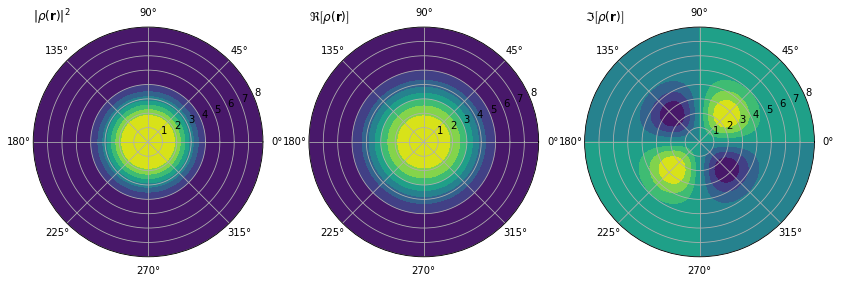

In [5]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho * rho.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho.imag)
plt.show()